<a href="https://colab.research.google.com/github/Annrosejojue/student-social-media-ml/blob/main/Social_Media_%26_Relationships_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Core
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

# Utils
import os


In [9]:
# Replace with your actual filename if different
csv_path = "/content/Students Social Media Addiction.csv"

df = pd.read_csv(csv_path)
df.head(20)


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
5,6,19,Female,Undergraduate,Australia,7.2,Instagram,Yes,4.5,4,Complicated,5,9
6,7,23,Male,Graduate,Germany,1.5,LinkedIn,No,8.0,9,Single,0,2
7,8,20,Female,Undergraduate,Brazil,5.8,Snapchat,Yes,6.0,6,In Relationship,2,8
8,9,18,Male,High School,Japan,4.0,TikTok,No,6.5,7,Single,1,5
9,10,21,Female,Graduate,South Korea,3.3,Instagram,No,7.0,7,In Relationship,1,4


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df.shape, df.dtypes


((705, 13),
 Student_ID                        int64
 Age                               int64
 Gender                           object
 Academic_Level                   object
 Country                          object
 Avg_Daily_Usage_Hours           float64
 Most_Used_Platform               object
 Affects_Academic_Performance     object
 Sleep_Hours_Per_Night           float64
 Mental_Health_Score               int64
 Relationship_Status              object
 Conflicts_Over_Social_Media       int64
 Addicted_Score                    int64
 dtype: object)

In [12]:
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Student_ID,705.0,NaN,NaN,NaN,353.0,203.660256,1.0,177.0,353.0,529.0,705.0
Age,705.0,NaN,NaN,NaN,20.659574,1.399217,18.0,19.0,21.0,22.0,24.0
Gender,705,2,Female,353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Academic_Level,705,3,Undergraduate,353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,705,110,India,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avg_Daily_Usage_Hours,705.0,NaN,NaN,NaN,4.918723,1.257395,1.5,4.1,4.8,5.8,8.5
Most_Used_Platform,705,12,Instagram,249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Affects_Academic_Performance,705,2,Yes,453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sleep_Hours_Per_Night,705.0,NaN,NaN,NaN,6.868936,1.126848,3.8,6.0,6.9,7.7,9.6
Mental_Health_Score,705.0,NaN,NaN,NaN,6.22695,1.105055,4.0,5.0,6.0,7.0,9.0


In [13]:
df.isna().mean().sort_values(ascending=False).head(20)



,0
Student_ID,0.0
Age,0.0
Gender,0.0
Academic_Level,0.0
Country,0.0
Avg_Daily_Usage_Hours,0.0
Most_Used_Platform,0.0
Affects_Academic_Performance,0.0
Sleep_Hours_Per_Night,0.0
Mental_Health_Score,0.0


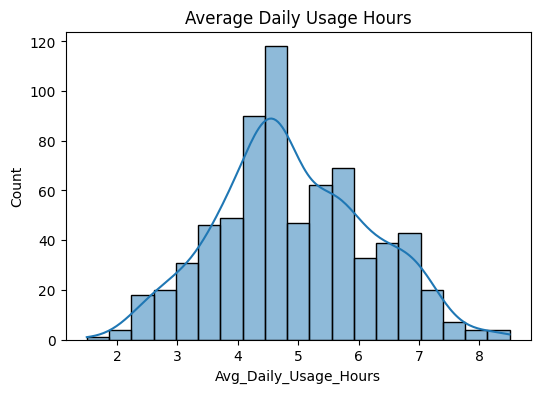

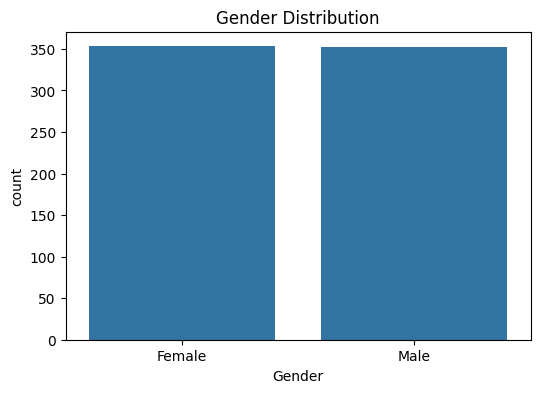

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(df["Avg_Daily_Usage_Hours"], kde=True)
plt.title("Average Daily Usage Hours")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Gender")
plt.title("Gender Distribution")
plt.show()


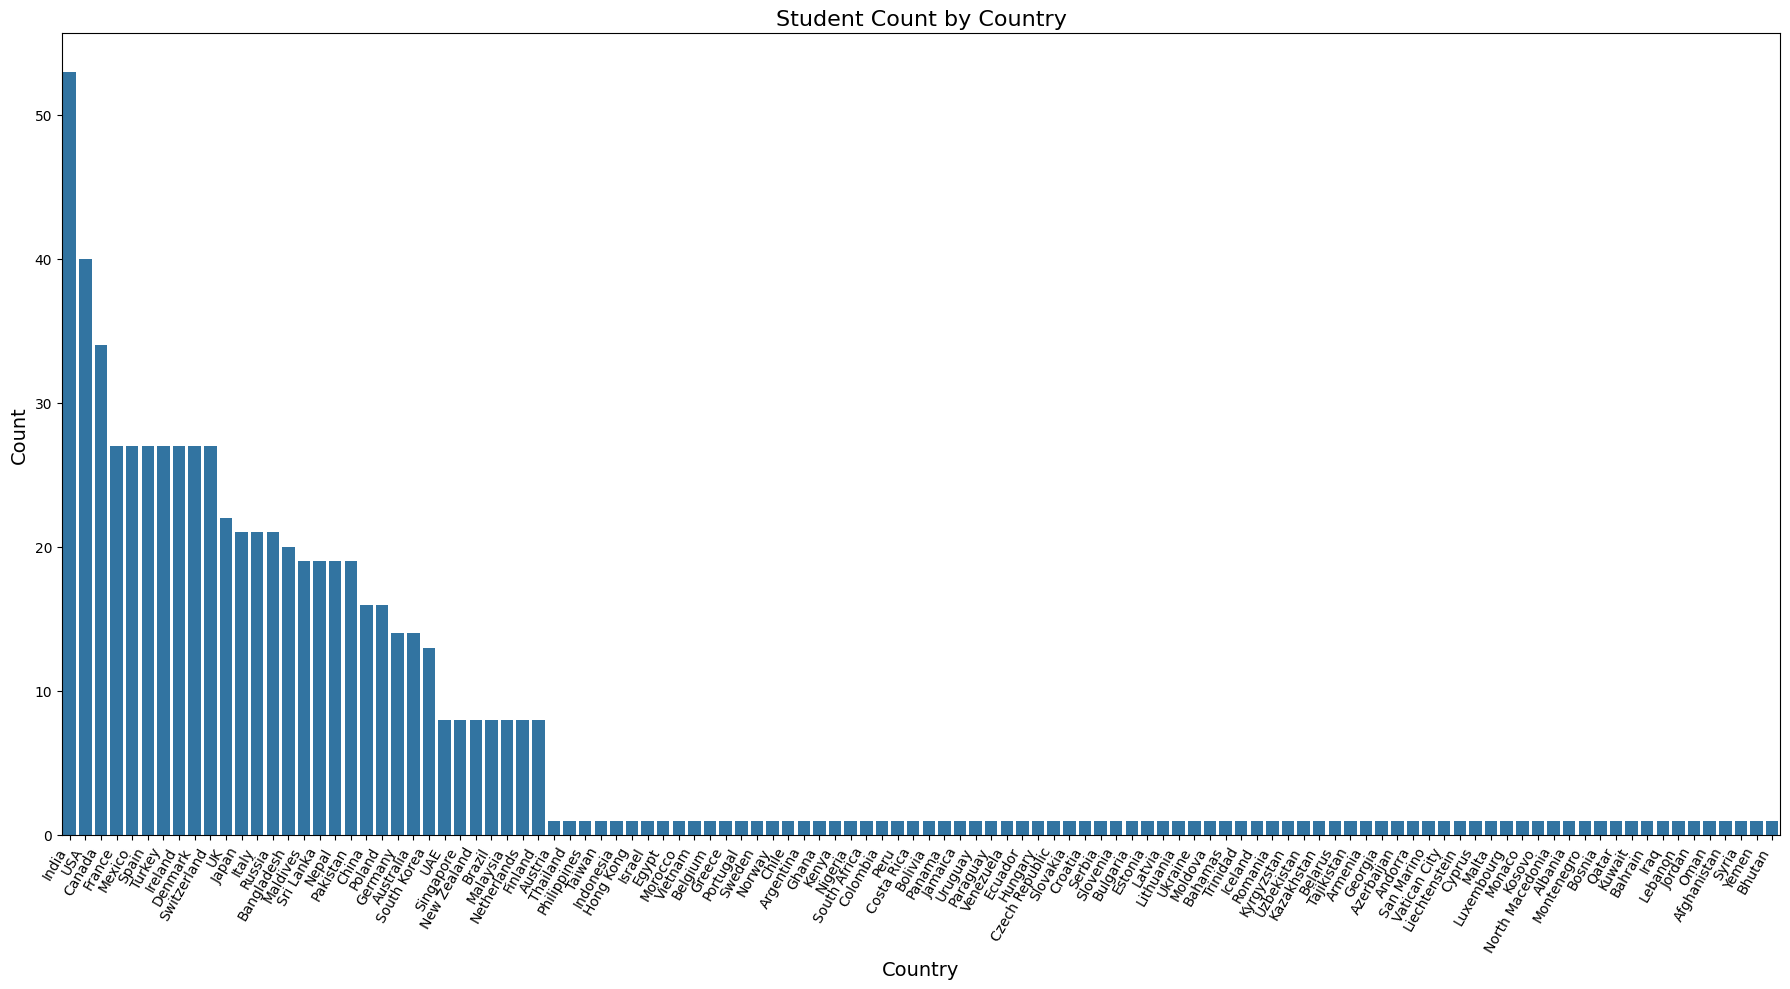

In [15]:
plt.figure(figsize=(18,10))  # Wider and taller for clarity
sns.countplot(data=df, x="Country", order=df["Country"].value_counts().index)
plt.xticks(rotation=60, ha="right", fontsize=10)  # Rotate more and shrink font slightly
plt.title("Student Count by Country", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.tight_layout()
plt.show()


In [16]:
df["Addiction_Level"] = np.where(df["Addicted_Score"] >= 7, "High", "Low")
df["Addiction_Level"].value_counts()


,count
Addiction_Level,
High,408
Low,297


In [17]:
target_col = "Addiction_Level"

numeric_features = [
    "Age",
    "Avg_Daily_Usage_Hours",
    "Sleep_Hours_Per_Night",
    "Mental_Health_Score",
    "Conflicts_Over_Social_Media",
    "Addicted_Score"
]

categorical_features = [
    "Gender",
    "Academic_Level",
    "Country",
    "Most_Used_Platform",
    "Relationship_Status"
]

df_model = df.dropna(subset=[target_col]).copy()

X = df_model[numeric_features + categorical_features]
y = df_model[target_col]

X.head(), y.head()


(   Age  Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night  Mental_Health_Score  \
 0   19                    5.2                    6.5                    6   
 1   22                    2.1                    7.5                    8   
 2   20                    6.0                    5.0                    5   
 3   18                    3.0                    7.0                    7   
 4   21                    4.5                    6.0                    6   
 
    Conflicts_Over_Social_Media  Addicted_Score  Gender Academic_Level  \
 0                            3               8  Female  Undergraduate   
 1                            0               3    Male       Graduate   
 2                            4               9  Female  Undergraduate   
 3                            1               4    Male    High School   
 4                            2               7    Male       Graduate   
 
       Country Most_Used_Platform Relationship_Status  
 0  Bangladesh          Inst

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", clf)
])

model


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Avg_Daily_Usage_Hours',
                                                   'Sleep_Hours_Per_Night',
                                                   'Mental_Health_Score',
                                                   'Conflicts_Over_Social_Media',
                                                   'Addicted_Score']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Academic_Level',
                                                   'Country',
                                                   'Most_Used_Platform',
                                                   'Relationship_Status'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [20]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Avg_Daily_Usage_Hours',
                                                   'Sleep_Hours_Per_Night',
                                                   'Mental_Health_Score',
                                                   'Conflicts_Over_Social_Media',
                                                   'Addicted_Score']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Academic_Level',
                                                   'Country',
                                                   'Most_Used_Platform',
                                                   'Relationship_Status'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       1.00      1.00      1.00        59

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141



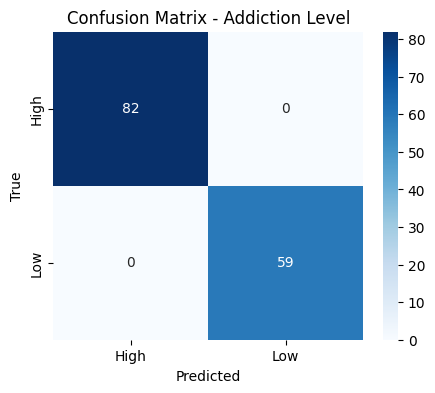

In [22]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Addiction Level")
plt.show()


In [23]:
rf = model.named_steps["classifier"]
ohe = model.named_steps["preprocessor"].named_transformers_["cat"].named_steps["onehot"]
ohe_features = ohe.get_feature_names_out(categorical_features)

all_features = numeric_features + list(ohe_features)
importances = rf.feature_importances_

feat_imp = pd.DataFrame({
    "feature": all_features,
    "importance": importances
}).sort_values("importance", ascending=False)

feat_imp.head(20)


,feature,importance
3,Mental_Health_Score,0.253426
5,Addicted_Score,0.248580
4,Conflicts_Over_Social_Media,0.154257
2,Sleep_Hours_Per_Night,0.110912
1,Avg_Daily_Usage_Hours,0.093133
114,Most_Used_Platform_TikTok,0.013751
108,Most_Used_Platform_Facebook,0.011741
88,Country_South Korea,0.011274
110,Most_Used_Platform_KakaoTalk,0.008056
118,Most_Used_Platform_WhatsApp,0.007995


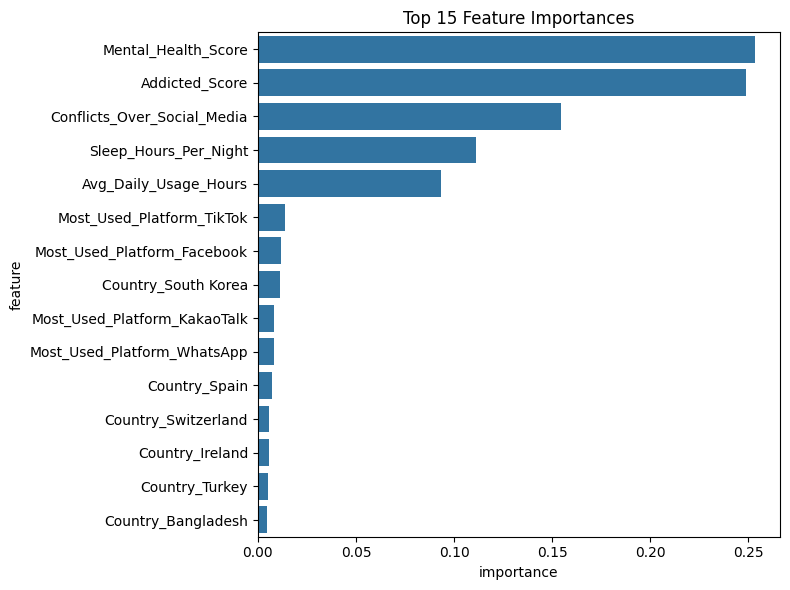

In [24]:
plt.figure(figsize=(8,6))
sns.barplot(data=feat_imp.head(15), x="importance", y="feature")
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()


In [25]:
cluster_features = [
    "Avg_Daily_Usage_Hours",
    "Sleep_Hours_Per_Night",
    "Mental_Health_Score",
    "Conflicts_Over_Social_Media",
    "Addicted_Score"
]

df_cluster = df_model[cluster_features].dropna().copy()

scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(df_cluster)


In [26]:
from sklearn.cluster import KMeans

k = 3  # choose 3 personas
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_cluster["cluster"] = kmeans.fit_predict(X_cluster_scaled)

df_cluster["cluster"].value_counts()


,count
cluster,
0,268
2,250
1,187


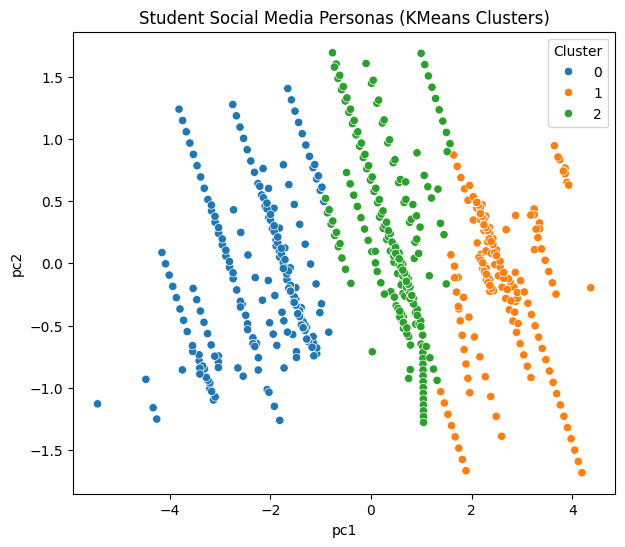

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
cluster_2d = pca.fit_transform(X_cluster_scaled)

df_cluster["pc1"] = cluster_2d[:, 0]
df_cluster["pc2"] = cluster_2d[:, 1]

plt.figure(figsize=(7,6))
sns.scatterplot(
    data=df_cluster,
    x="pc1",
    y="pc2",
    hue="cluster",
    palette="tab10"
)
plt.title("Student Social Media Personas (KMeans Clusters)")
plt.legend(title="Cluster")
plt.show()


In [28]:
df_personas = df_model.loc[df_cluster.index].copy()
df_personas["cluster"] = df_cluster["cluster"]

df_personas.head()


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Addiction_Level,cluster
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,High,2
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,Low,0
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,High,1
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,Low,0
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,High,2
